# Анализ данных интернет-магазина

Вместе с отделом маркетинга был подготовлен список гипотез для увеличения выручки. В связи с чем, нам необходимо приоритизировать гипотезы, запустить А/В тестирование и проанализировать полученные результаты

**Описание данных**

Файл hypothesis. 
- Hypothesis — краткое описание гипотезы;
- Reach — охват пользователей по 10-балльной шкале;
- Impact — влияние на пользователей по 10-балльной шкале;
- Confidence — уверенность в гипотезе по 10-балльной шкале;
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

Файл orders 
- transactionId — идентификатор заказа;
- visitorId — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ.

Файл visitors 
- date — дата;
- group — группа A/B-теста;
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста

## Приоритизация гипотез

В файле hypothesis.csv представлены 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами **Reach, Impact, Confidence, Effort**.

**Задача**
- Применить фреймворк ICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
- Применить фреймворк RICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
- Указать, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объяснить, почему так произошло.

### Приоритизация гипотезы с помощью ICE

Придётся выбрать, что будем тестировать, а чему скажем «нет». Чтобы максимизировать ожидаемое улучшение ключевых метрик бизнеса, сформулированные гипотезы приоритизирируем

Для начала загрузим данные и посмотрим на них

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import warnings
import scipy.stats as stats

In [3]:
#посмотрим на полученный датафрейм
data

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


Перед нами таблица с гипотезами и их оценками по следующим параметрам: Reach — охват пользователей по 10-балльной шкале;
Impact — влияние на пользователей по 10-балльной шкале;
Confidence — уверенность в гипотезе по 10-балльной шкале;
Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

In [4]:
pd.set_option('display.max_colwidth', None)

In [5]:
#посчитаем ICE для гипотез:
data['ICE'] = (data['Impact']*data['Confidence'])/data['Efforts']
data['ICE'] = round(data['ICE'], 2)

In [6]:
#выведем ICE на экран
data[['Hypothesis', 'ICE']].sort_values(by='ICE', ascending = False)

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


Как видим, наиболее перспективными гипотезами по ICE являются: 8,0 и 7 гипотезы: 8- Запустить акцию, дающую скидку на товар в день рождения, 0- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей и 7-Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок	

### Приоритизация гипотезы с помощью RICE

А теперь посмотрим на гипотезы с учетом того, скольких пользователей затронят изменения, которые мы хотим внести. Для этого используем метод RICE

In [7]:
pd.set_option('display.max_colwidth', None)

In [8]:
#посчитаем RICE для гипотез:
data['RICE'] = (data['Impact']*data['Confidence']*data['Reach'])/data['Efforts']

In [9]:
#выведем RICE на экран
data[['Hypothesis', 'RICE']].sort_values(by='RICE', ascending = False)

,Hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Как видим, наиболее перспективными гипотезами по ICE являются: 7, 2 и 0 гипотезы.
Наиболее высокий приоритет теперь у гипотезы №7 ("Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок"), которая получила оценку RICE в 112.0. Это произошло из-за того, что помимо высокого показателя ICE у этой гипотезы также высокий охват (Reach), что означает, что она затронет множество пользователей.

Гипотеза №2 ("Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа") также существенно увеличила свой приоритет при использовании RICE. Её рейтинг RICE составил 56.0, что делает её второй по приоритетности. Это объясняется тем, что даже при более низкой оценке по ICE, эта гипотеза имеет высокий охват и достаточно высокий потенциальный эффект. Реализация данной гипотезы предположительно даст маленький эффект и потребует небольших затрат, однако окажет влияние на большое количество пользователей 

Гипотеза №0 ("Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей") также сохраняет свою значимость, хотя немного потеряла в приоритетности по сравнению с ICE, теперь занимая третье место с рейтингом RICE 40.0.
А вот лидер в рейтинге по ICE гипотеза 8 в топ этого рейтинга не попала, поскольку у данной гипотезы, несмотря на высокие показатели Impact и Confidence, самый низкий охват пользователей.

Изменение приоритизации гипотез при использовании RICE вместо ICE произошло из-за того, что RICE учитывает не только потенциальный эффект изменений (Impact) и уверенность в его достижении (Confidence), но также охват (Reach), то есть, насколько широко изменения затронут пользователей. Таким образом, гипотезы с высоким охватом, даже если их потенциальный эффект не так велик, могут иметь более высокий приоритет при применении RICE.

## A/B тестирование

Было проведено А/B тестирование, в результате которого получили данные, представленные в файлах orders.csv и visitors.csv
Для начала изучим полученные таблицы

In [10]:
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

In [11]:
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

In [12]:
#выведем первые 10 строк на экран датасета orders
orders.head(10)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B


In [13]:
# посмотрим на полную информацию о orders
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [14]:
#проверим наличие пропусков
orders.isna().sum()

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

In [15]:
#проверим наличие дубликатов
orders.duplicated().sum()

0

In [16]:
#выведем первые 10 строк на экран датасета visitors
visitors.head(10)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


In [17]:
# посмотрим на полную информацию о visitors
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [18]:
#проверим наличие пропусков
visitors.isna().sum()

date        0
group       0
visitors    0
dtype: int64

In [19]:
#проверим наличие дубликатов
visitors.duplicated().sum()

0

При анализе данных таблиц visitors и orders, пропусков и дубликатов не обнаружено. Стоит привести названия столбцов в датафрейме visitors к правильному стилю.

In [20]:
#поправим названия в таблице visitors
orders = orders.rename(columns={'transactionId':'transaction_id', 'visitorId':'visitor_id'})

In [21]:
orders.head()

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


Далее выполним проверку, не попадают ли какие-то пользователи в обе группы - по таблице с заказами.

In [22]:
# сгруппируем данные по visitor_id и подсчет уникальных значений группы
group_counts = orders.groupby('visitor_id')['group'].nunique().reset_index()
# выберем пользователей, у которых количество уникальных значений группы больше 1
users_in_both_groups = group_counts[group_counts['group'] > 1]

In [23]:
users_in_both_groups

,visitor_id,group
2,8300375,2
44,199603092,2
51,232979603,2
55,237748145,2
66,276558944,2
84,351125977,2
97,393266494,2
114,457167155,2
119,471551937,2
122,477780734,2


Таких пользователей 58. Если пользователи попадают в обе группы A/B-тестирования, это может указывать на наличие проблемы или ошибки в процессе разделения пользователей на группы. Пользователей, попавших в обе группы, можно исключить из анализа результатов тестирования, чтобы не искажать результаты.

In [24]:
# попробуем удалить пользователей, которые состоят только в одной группе
single_group_users = group_counts[group_counts['group'] <= 1]['visitor_id']
# Оставим только те строки в датафрейме orders, где visitor_id присутствует в single_group_users
orders = orders[orders['visitor_id'].isin(single_group_users)]

проверим, остались ли такие пользователи, которые состоят в более, чем 1 группе

In [25]:
# сгруппируем данные по visitor_id и подсчет уникальных значений группы
group_counts = orders.groupby('visitor_id')['group'].nunique().reset_index()
# выберем пользователей, у которых количество уникальных значений группы больше 1
users_in_both_groups = group_counts[group_counts['group'] > 1]

In [26]:
users_in_both_groups

,visitor_id,group


### График кумулятивной выручки по группам

Далее изучим графики кумулятивных, или накапливаемых данных. 

Для этого сначала подготовим данные

In [27]:
#Создадим массив уникальных пар значений дат и групп теста методом drop_duplicates()
datesGroups = orders[['date','group']].drop_duplicates() 

In [28]:
datesGroups.head()

,date,group
0,2019-08-15,B
7,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A


Соберём агрегированные кумулятивные по дням данные о заказах в несколько действий. 

In [29]:
#Получим строки таблицы orders, дата которых меньше или равна дате элемента из datesGroups
#Агрегируем значения
ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transaction_id': 'nunique',
            'visitor_id': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])


In [30]:
ordersAggregated

,date,group,transaction_id,visitor_id,revenue
55,2019-08-01,A,23,19,142779
66,2019-08-01,B,17,17,59758
175,2019-08-02,A,42,36,234381
173,2019-08-02,B,40,39,221801
291,2019-08-03,A,66,60,346854
...,...,...,...,...,...
533,2019-08-29,B,510,490,4746610
757,2019-08-30,A,460,437,3311413
690,2019-08-30,B,531,511,4955833
958,2019-08-31,A,468,445,3364656


In [31]:
#Получим строки таблицы visitors, дата которых меньше или равна дате элемента из datesGroups
#Агрегируем значения
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

In [32]:
visitorsAggregated

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845
...,...,...,...
533,2019-08-29,B,17708
757,2019-08-30,A,18037
690,2019-08-30,B,18198
958,2019-08-31,A,18736


In [33]:
# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])

In [34]:
cumulativeData.head()

,date,group,transaction_id,visitor_id,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845


In [35]:
#переименуем полученные данные
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

In [36]:
cumulativeData.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845


Объявим переменные cumulativeRevenueA и cumulativeRevenueB, в которых сохраним данные о датах, выручке и числе заказов в группах A и B.

In [37]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

In [38]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

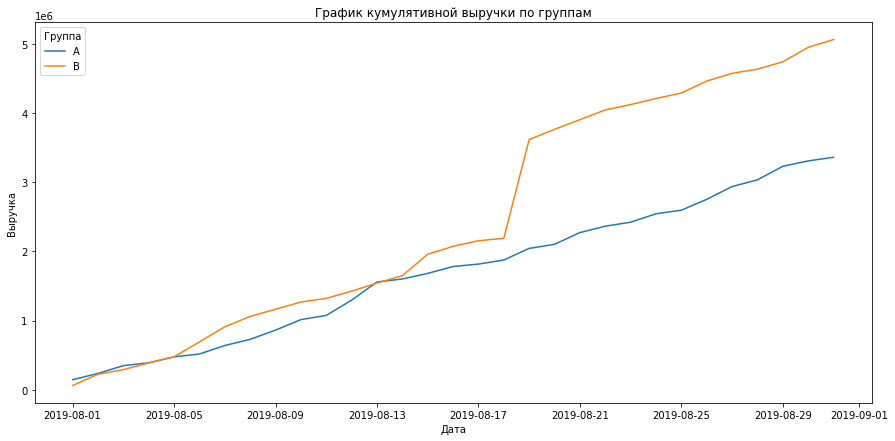

In [39]:
# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.title('График кумулятивной выручки по группам')
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.legend(title='Группа')
plt.gcf().set_size_inches(15, 7) 
plt.show()

Согласно полученному графику, почти сразу группа B вырвалась вперёд и продолжала лидировать весь остаток теста. Не исключено, что резкий рост может быть результатом случайных факторов или выбросов данных. В таком случае необходимо провести более глубокий анализ данных и проверить наличие аномалий или ошибок.

### График кумулятивного среднего чека по группам

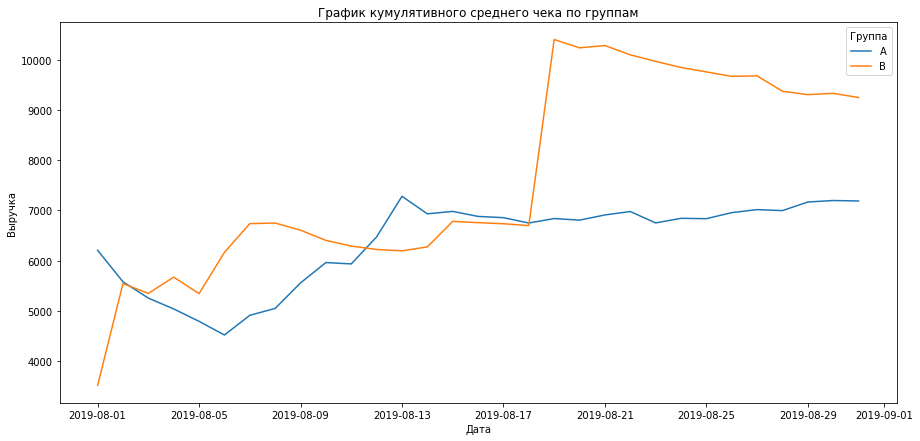

In [40]:
# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('График кумулятивного среднего чека по группам')
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.legend(title='Группа')
plt.gcf().set_size_inches(15, 7) 
plt.show()

Кумулятивное значение среднего чека колеблется. Хоть группа В сразу же стала лидировать, в середине теста произошел провал. Возможно, требуется дополнительный анализ выбросов, которые могут искажать результаты.

### График относительного изменения кумулятивного среднего чека группы B к группе A.

In [41]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

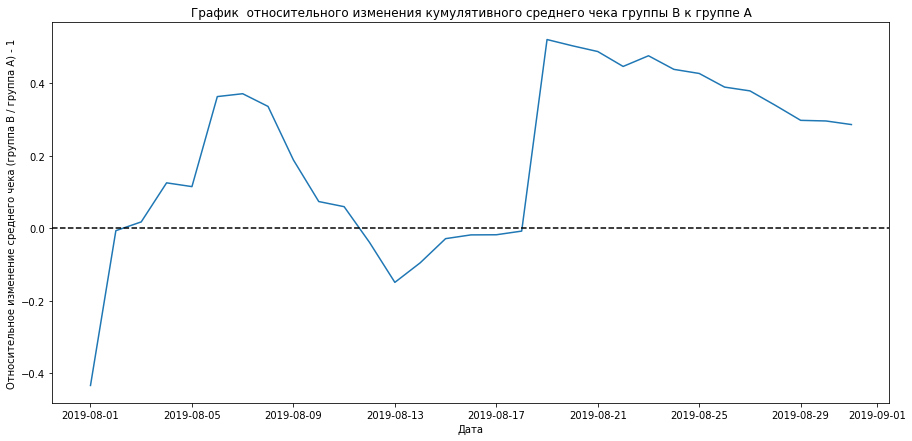

In [42]:
# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'],
(mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 
plt.title('График  относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Относительное изменение среднего чека (группа B / группа A) - 1')
plt.gcf().set_size_inches(15, 7) 
plt.show()

Результаты теста значительно и резко менялись в несколько дат. Видимо, именно тогда были совершены аномальные заказы.

### График кумулятивного среднего количества заказов на посетителя по группам

In [43]:
# считаем среднее количество заказов на посетителя
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

In [44]:
# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

In [45]:
# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

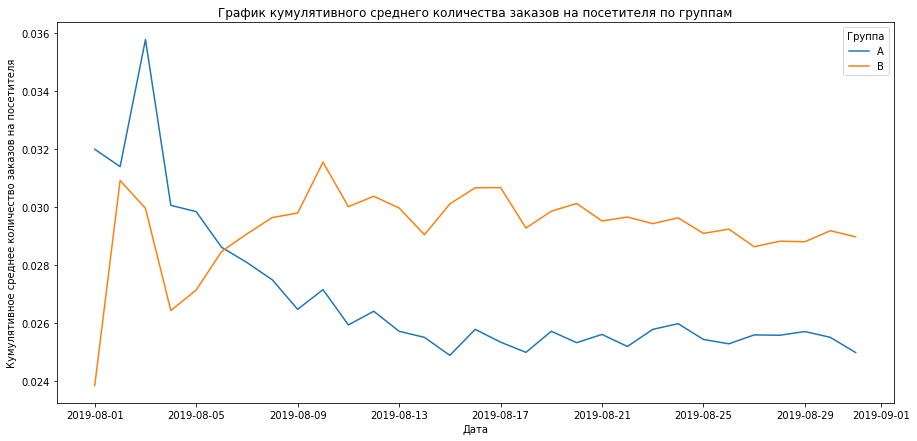

In [46]:
# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.xlabel('Дата')
plt.ylabel('Кумулятивное среднее количество заказов на посетителя')
plt.legend(title='Группа')
plt.gcf().set_size_inches(15, 7) 

В начале теста группа A имела большее кумулятивное среднее количество заказов, но постепенно сегмент B выровнялся и зафиксировался примерно около одного значения, больше значения сегмента A.

### График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

In [47]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])


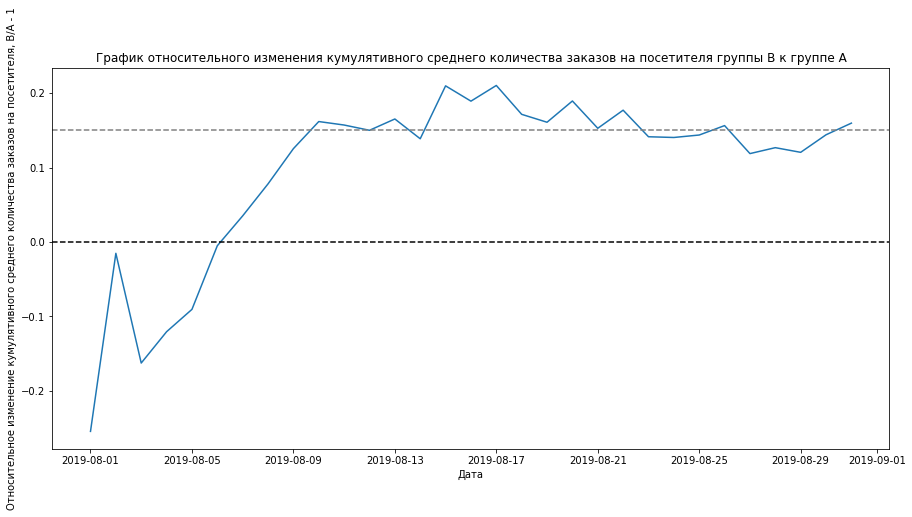

In [48]:
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)
plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Относительное изменение кумулятивного среднего количества заказов на посетителя, B/A - 1')
plt.gcf().set_size_inches(15, 7) 
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.15, color='grey', linestyle='--')
# Преобразуем даты в объекты datetime
start_date = pd.to_datetime('2019-08-01')
end_date = pd.to_datetime('2019-09-01')

Почти с самого начала теста группа B лидирует по метрике(за исключением провала в районе 03.08 до 06.08): становится лучше и лучше. В районе 15.08 группа зафиксировалась около прироста в 20% относительно группы A, после чего пошел спад до ок 15% и стабилизация. 

### График количества заказов по пользователям

In [49]:
#определим количество заказов для каждого уникального пользователя
ordersByUsers = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)

In [50]:
#выведем на экран полученную таблицу
ordersByUsers.head()

,visitor_id,transaction_id
0,5114589,1
1,6958315,1
2,11685486,1
3,39475350,1
4,47206413,1


In [51]:
#переименуем колонки
ordersByUsers.columns = ['user_id', 'orders']

In [52]:
ordersByUsers.head()

,user_id,orders
0,5114589,1
1,6958315,1
2,11685486,1
3,39475350,1
4,47206413,1


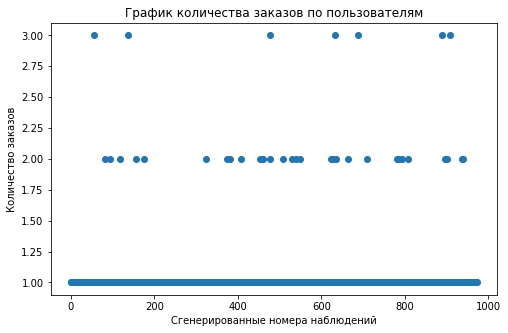

In [53]:
#Построим диаграмму методом scatter()
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders']) 
plt.title('График количества заказов по пользователям')
plt.xlabel('Сгенерированные номера наблюдений')
plt.ylabel('Количество заказов')
plt.gcf().set_size_inches(8, 5) 

Согласно графику, большинство покупателей заказывали только один раз. Однако, доля пользователей с 2 заказами тоже значительна. Пользователи, заказавшие более 3-х раз вполне могут быть аномальными 

In [54]:
#Посчитаем выборочные перцентили количества заказов на одного пользователя:
np.percentile(ordersByUsers['orders'], [90, 95, 99])

array([1., 1., 2.])

Не более 1% пользователей оформляли больше чем 2 заказа. Скорее всего, пользователей, заказавших более 2-х раз можно считать аномальными

### График стоимостей заказов

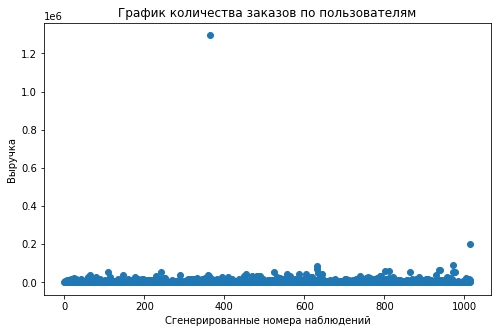

In [55]:
#Построим диаграмму методом scatter()
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']) 
plt.title('График количества заказов по пользователям')
plt.ylabel('Выручка')
plt.xlabel('Сгенерированные номера наблюдений')
plt.gcf().set_size_inches(8, 5) 

Большинство заказов приходятся до 100 тыс рублей. Есть единичные выбросы в районе 200 000 и 1 250 000 рублей 
Из-за таких выбросов сложно рассмотреть более детально диапазон до 100 тыс рублей, поскольку масштаб графика вытягивается

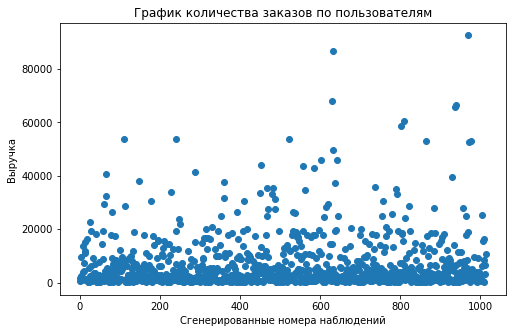

In [56]:
#попробуем отфильтровать данные до 200 000 руб
x_values = pd.Series(range(0, len(orders['revenue'])))
filtered_revenue = orders['revenue'][orders['revenue'] <= 200000]
plt.scatter(x_values[:len(filtered_revenue)], filtered_revenue) 
plt.title('График количества заказов по пользователям')
plt.ylabel('Выручка')
plt.xlabel('Сгенерированные номера наблюдений')
plt.gcf().set_size_inches(8, 5)

Судя по этому графику, наибольшее количество заказов - заказы до 20000 руб

In [57]:
#Посчитаем выборочные перцентили выручки с заказов по пользователям:
np.percentile(orders['revenue'], [90,95,99])

array([17990., 26785., 53904.])

Не более, чем у 5% заказов чек дороже 26785 рублей. И не больше, чем у 1% заказов — дороже 53 904 рублей. Все, что больше 53904 тысяч, можно считать аномальными значениями

### Расчет статистической значимости различий в среднем количестве заказов на посетителя между группами по «сырым» данным

Подготовим данные:

In [58]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

In [59]:
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

In [60]:
ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

In [61]:
#выведем на экран полученную таблицу
ordersADaily.head()

,date,ordersPerDateA,revenuePerDateA
0,2019-08-01,23,142779
1,2019-08-02,19,91602
2,2019-08-03,24,112473
3,2019-08-04,11,41176
4,2019-08-05,22,86383


In [62]:
ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

In [63]:
ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

In [64]:
#выведем на экран полученную таблицу
ordersBDaily.head()

,date,ordersPerDateB,revenuePerDateB
0,2019-08-01,17,59758
1,2019-08-02,23,162043
2,2019-08-03,14,67049
3,2019-08-04,14,96890
4,2019-08-05,21,89908


In [65]:
ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

In [66]:
data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

In [67]:
data.head(5)

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707,3318,3280


Получили таблицу со следующими столбцами: 
- date — дата;
- ordersPerDateA — количество заказов в выбранную дату в группе A;
- revenuePerDateA — суммарная выручка в выбранную дату в группе A;
- ordersPerDateB — количество заказов в выбранную дату в группе B;
- revenuePerDateB — суммарная выручка в выбранную дату в группе B;
- ordersCummulativeA — суммарное число заказов до выбранной даты включительно в группе A;
- revenueCummulativeA — суммарная выручка до выбранной даты включительно в группе A;
- ordersCummulativeB — суммарное количество заказов до выбранной даты включительно в группе B;
- revenueCummulativeB — суммарная выручка до выбранной даты включительно в группе B;
- visitorsPerDateA — количество пользователей в выбранную дату в группе A;
- visitorsPerDateB — количество пользователей в выбранную дату в группе B;
- visitorsCummulativeA — количество пользователей до выбранной даты включительно в группе A;
- visitorsCummulativeB — количество пользователей до выбранной даты включительно в группе B.

Посчитаем статистическую значимость различия в среднем количестве заказов между группами.

In [68]:
#Создадим переменные ordersByUsersA и ordersByUsersB со столбцами ['userId', 'orders']
#В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов. 
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

In [69]:
#Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов
#Тем, кто ничего не заказал, будут соответствовать нули.
sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

In [70]:
sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

Проверим статистическую значимость различий в среднем количестве заказов на посетителя между группами. 
- **Нулевая гипотеза**: различий в среднем количестве заказов между группами нет. 
- **Альтернативная гипотеза**: различия в среднем количестве заказов между группами есть. 
- Уровень статистической значимости (значение **alpha**) =**0.05**

Используем метод mannwhitneyu() для проверки статистической значимости различий в среднем количестве заказов между группами, потому что он подходит для анализа независимых выборок и не требует предположений о распределении данных. Чтобы рассчитать статистическую значимость различий в среднем количестве заказов, передадим критерию mannwhitneyu() данные о выручке с заказов. А ещё найдём относительные различия в среднем чеке между группами:

In [71]:
# рассчитаем р-value
print("p-value: {0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
# выведем относительный прирост среднего числа заказов группы B
print("Относительный прирост среднего числа заказов группы B: {0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

p-value: 0.011
Относительный прирост среднего числа заказов группы B: 0.160


Первое число — p-value = 0.011 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, отвергаем. Это означает, что существует статистически значимое различие между группами. Относительный прирост среднего числа заказов в группе B составляет 16%. Это указывает на то, что в группе B среднее количество заказов выше, чем в группе A, и этот прирост является статистически значимым. Итак, на основе этих результатов мы можем сделать вывод, что изменение, внесенное в группе B, скорее всего, положительно повлияло на количество заказов, и это различие является статистически значимым.

### Расчет статистической значимости различий в среднем чеке заказа между группами по «сырым» данным.

Теперь проверим статистическую значимость различий в среднем чеке между сегментами. 
- **Нулевая гипотеза**: различий в среднем чеке между группами нет. 
- **Альтернативная гипотеза**: различия в среднем чеке между группами есть.
- Уровень статистической значимости (значение **alpha**) =**0.05**

Чтобы рассчитать статистическую значимость различий в среднем чеке, передадим критерию mannwhitneyu() данные о выручке с заказов.  А ещё найдём относительные различия в среднем чеке между группами:

In [72]:
# рассчитаем р-value
print('p-value: {0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
# выведем относительный прирост среднего чека заказа группы B
print('относительный прирост среднего чека заказа группы B: {0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

p-value: 0.829
относительный прирост среднего чека заказа группы B: 0.287


Так как p-value (0.829) значительно больше уровня статистической значимости (=0.05), нет достаточных оснований отвергнуть нулевую гипотезу. Это означает, что различий в среднем чеке заказа между группами нет на статистически значимом уровне.
Относительный прирост среднего чека заказа в группе B составляет 28.7%, но без статистической значимости этот результат не имеет большого значения. Вероятно, это не является статистически значимым улучшением.Таким образом, по «сырым» данным мы не можем сделать вывод о наличии статистически значимых различий в среднем чеке заказа между группами.

### Расчет статистической значимости различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.

Примем за аномальных пользователей тех, кто совершил более 3 заказов или совершил заказ дороже 58 000 рублей. Так мы уберём 1-5% пользователей с наибольшим числом заказов и 1% пользователей с дорогими заказами. Сделаем срезы пользователей с числом заказов больше 3 — usersWithManyOrders и пользователей, совершивших заказы дороже 58 000 — usersWithExpensiveOrders. Объединим их в таблице abnormalUsers. 
Узнаем, сколько всего аномальных пользователей атрибутом shape.

In [73]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] >  np.percentile(ordersByUsers['orders'], 99)]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] >  np.percentile(ordersByUsers['orders'], 99)]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > np.percentile(orders['revenue'], 99)]['visitor_id']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

In [74]:
abnormalUsers.head(5)
abnormalUsers.shape[0]

16

Получилось всего 16 аномальных пользователей

Узнаем, как их действия повлияли на результаты теста. Посчитаем статистическую значимость различий в среднем количестве заказов между группами теста по очищенным данным. Сначала подготовим выборки количества заказов по пользователям по группам теста:


In [75]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

Проверим статистическую значимость различий в среднем количестве заказов на посетителя между группами после фильтрации данных.

- **Нулевая гипотеза**: различий в среднем количестве заказов между группами нет.
- **Альтернативная гипотеза**: различия в среднем количестве заказов между группами есть.
- Уровень статистической значимости (значение **alpha**) =**0.05**

In [76]:
#Применим статистический критерий Манна-Уитни к полученным выборкам:
# рассчитаем р-value
' р-value: {0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1])

' р-value: 0.007'

In [77]:
# выведем относительный прирост среднего числа заказов группы B
'относительный прирост среднего числа заказов группы B: {0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)

'относительный прирост среднего числа заказов группы B: 0.189'

р-value > 0.05 значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, отвергаем. Это означает, что существует статистически значимое различие между группами. До фильтрации данных: р-value = 0.011 и относительный прирост среднего числа заказов группы B = 0.160. После фильтрации аномальных заказов p-value стало меньше, что указывает на более высокую статистическую значимость различий между группами.
Относительный прирост среднего числа заказов в группе B также немного увеличился с 0.160 до 0.164.
Эти изменения подтверждают, что после фильтрации аномальных заказов различия в среднем количестве заказов на посетителя между группами стали более значимыми статистически. Таким образом, изменения, внесенные в группе B, вероятно, действительно повлияли на количество заказов, и это различие статистически значимо.

### Расчет статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным.

Посмотрим, произошло ли что-нибудь с результатами по среднему чеку

Теперь проверим статистическую значимость различий в среднем чеке между группами после фильтрации данных

- **Нулевая гипотеза**: различий в среднем чеке между группами нет.
- **Альтернативная гипотеза**: различия в среднем чеке между группами есть.
- Уровень статистической значимости (значение **alpha**) =**0.05**

In [78]:
'р-value: {0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )

'р-value: 0.788'

In [79]:
"относительный прирост среднего чека заказа в группе B: {0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )

'относительный прирост среднего чека заказа в группе B: -0.032'

Так как p-value значительно больше уровня статистической значимости, нет достаточных оснований отвергнуть нулевую гипотезу. Это означает, что различий в среднем чеке заказа между группами нет на статистически значимом уровне. Сравнивая эти результаты с исходными данными до фильтрации, где p-value = 0.829 и относительный прирост среднего чека заказа в группе B = 0.287, мы видим, что: После фильтрации аномальных заказов p-value уменьшилось с 0.829 до 0.788. Это означает, что после фильтрации статистически значимых различий в среднем чеке заказа между группами не наблюдается.
Относительный прирост среднего чека заказа в группе B изменился с положительного значения (0.287) на небольшое отрицательное значение (-0.032). Это указывает на то, что после фильтрации аномалий средний чек заказа в группе B снизился.
Таким образом, после фильтрации аномальных заказов различий в среднем чеке заказа между группами нет на статистически значимом уровне, и относительный прирост среднего чека в группе B стал незначительно отрицательным.
Изменение относительного прироста среднего чека группы B после удаления выбросов может быть объяснено изменением самого значения среднего чека в группе B после очистки данных. Когда мы убираем выбросы из данных, мы убираем самые крупные заказы, которые могут сильно исказить среднее значение. Вероятно, в исходных данных в группе B были несколько очень крупных заказов, что повысило средний чек в этой группе. После удаления этих крупных заказов средний чек группы B уменьшился, что привело к изменению его относительного прироста по сравнению с группой A.
Отрицательное значение относительного прироста в данном контексте говорит о том, что после удаления выбросов средний чек группы B стал ниже, чем в группе A. Вероятно, это может быть связано с тем, что крупные заказы вносили больший вклад в средний чек группы B, чем в группу A, и после их удаления этот эффект исчез. 

### Вывод

На основании результатов анализа A/B тестирования можно сделать следующие выводы и принять соответствующее решение:
Группа B продемонстрировала значительное улучшение в среднем количестве заказов на посетителя по сравнению с группой A как по "сырым", так и по "очищенным" данным. Это изменение является статистически значимым и вероятно обусловлено проведенными изменениями.
Статистически значимых различий в среднем чеке заказа между группами не наблюдается ни по "сырым", ни по "очищенным" данным. Вероятно, различия, выявленные в начале теста, были вызваны аномальными значениями.
Группа B также продемонстрировала увеличение кумулятивной выручки и кумулятивного среднего чека по сравнению с группой A, но не на стабильном уровне, что может быть вызвано аномалиями или естественной вариативностью.
Изменения в кумулятивном среднем количестве заказов на посетителя стабилизировались к концу теста, а в кумулятивном среднем чеке заказа подвержены значительным колебаниям, что требует дополнительного анализа и возможно устранения аномалий.
Принимая во внимание значительное улучшение в среднем количестве заказов на посетителя в группе B и отсутствие статистически значимых различий в среднем чеке заказа между группами, а также учитывая увеличение кумулятивной выручки и кумулятивного среднего чека, хоть и на непостоянном уровне, предлагается остановить тест и зафиксировать победу группы B.
Это решение обосновано тем, что группа B продемонстрировала значительное улучшение ключевого показателя – среднего количества заказов на посетителя, что важно для бизнеса, и не наблюдалось статистически значимых различий в среднем чеке заказа. Также, учитывая нестабильность кумулятивной выручки и кумулятивного среднего чека в группе B, возможно, требуется дополнительный анализ и устранение аномалий, но основные тенденции уже позволяют сделать вывод о выигрыше группы B.